# Feature Analysis

In [1]:
from mlrun import mlconf, import_function, set_environment, run_local
from mlrun.platforms import  mount_pvc

## Import AutoML Feature Analysis serverless function from MLRun marketplace 

In [2]:
set_environment(artifact_path='./data', project='demo')

'/home/jovyan/data'

In [3]:
fn = import_function('hub://describe')

In [4]:
# read the remote function doc, params, usage
fn.doc()

function: describe
describe and visualizes dataset stats
default handler: summarize
entry points:
  summarize: Summarize a table
    context(MLClientCtx)  - the function context, default=
    table(DataItem)  - MLRun input pointing to pandas dataframe (csv/parquet file path), default=
    label_column(str)  - ground truth column label, default=None
    class_labels(List[str])  - label for each class in tables and plots, default=[]
    plot_hist(bool)  - (True) set this to False for large tables, default=True
    plots_dest(str)  - destination folder of summary plots (relative to artifact_path), default=plots
    update_dataset  - when the table is a registered dataset update the charts in-place, default=False


## Run a cluster job to process data in the NFS Volume and generate plots (saved in ./Plots)

<b> Note that the same job can be invoked from a remote Jupyter/IDE client </b>

In [5]:
# connect our serverless function to the NFS volume 
#fn.apply(mount_pvc('basic', volume_mount_path='/data'))
run_local(None, fn, params={'label_column': 'label'}, 
       inputs={"table": 'https://s3.wasabisys.com/iguazio/data/iris/iris_dataset.csv'})
# run the function pointing the input and output paths to the NFS volume


> 2020-11-16 00:05:01,559 [info] starting run describe-summarize uid=e42a5cff7a8c476f91c8bbd64d60750c DB=http://localhost:8080


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
default,...60750c,0,Nov 16 00:05:02,completed,describe-summarize,kind=owner=jovyanhost=90c71f72d751,table,label_column=label,,histogramsviolinimbalanceimbalance-weights-veccorrelation-matrixcorrelation


to track results use .show() or .logs() or in CLI: 
!mlrun get run e42a5cff7a8c476f91c8bbd64d60750c --project default , !mlrun logs e42a5cff7a8c476f91c8bbd64d60750c --project default
> 2020-11-16 00:05:07,177 [info] run executed, status=completed


## Run Training Job

In [6]:
fn = import_function('hub://sklearn_classifier')

> 2020-11-16 00:06:11,947 [info] starting run sklearn-classifier-train_model uid=9895e70107b2499c96b7a742e5ddea27 DB=http://localhost:8080


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
demo,...ddea27,0,Nov 16 00:06:12,completed,sklearn-classifier-train_model,kind=owner=jovyanhost=90c71f72d751class=sklearn.ensemble.RandomForestClassifier,dataset,sample=-1label_column=labeltest_size=0.1model_pkg_class=sklearn.ensemble.RandomForestClassifier,accuracy=0.9705882352941176test-error=0.029411764705882353auc-micro=0.9969723183391004auc-weighted=0.9949732620320856f1-score=0.9679633867276888precision_score=0.9666666666666667recall_score=0.9722222222222222,test_setconfusion-matrixfeature-importancesprecision-recall-multiclassroc-multiclassmodel


to track results use .show() or .logs() or in CLI: 
!mlrun get run 9895e70107b2499c96b7a742e5ddea27 --project demo , !mlrun logs 9895e70107b2499c96b7a742e5ddea27 --project demo
> 2020-11-16 00:06:14,487 [info] run executed, status=completed


<Figure size 432x288 with 0 Axes>

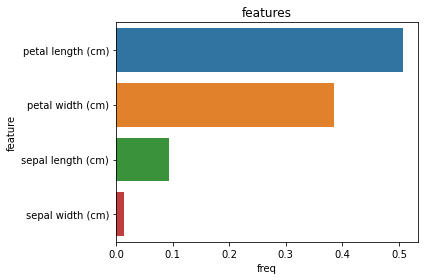

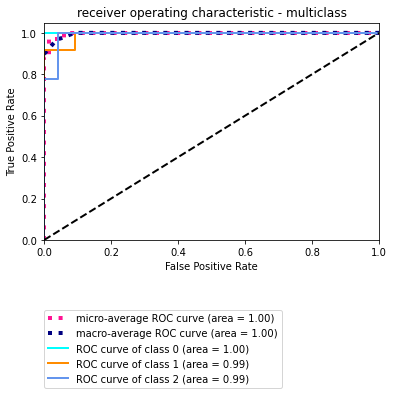

In [7]:
# run the function pointing the input and output paths to the NFS volume
run_local(None, fn, params={"sample"          : -1, 
               "label_column"    : "label",
               "test_size"       : 0.10,
               'model_pkg_class': "sklearn.ensemble.RandomForestClassifier"},
       inputs={"dataset": 'https://s3.wasabisys.com/iguazio/data/iris/iris_dataset.csv'})

In [9]:
!pip install scikit-plot